# Los siete puentes de Königsberg

In [90]:
import networkx as nx
import matplotlib.pyplot as plt


In [91]:
# Creación del grafo de Königsberg
G = nx.MultiGraph()

# Regiones: A=Orilla Norte, B=Orilla Sur, C=Isla 1, D=Isla 2
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")

# Puentes (aristas)
G.add_edge("C", "A")  # Puente 1
G.add_edge("C", "A")  # Puente 2
G.add_edge("C", "D")  # Puente 3
G.add_edge("A", "D")  # Puente 4
G.add_edge("B", "D")  # Puente 5
G.add_edge("B", "A")  # Puente 6
G.add_edge("B", "A")  # Puente 7


1

In [92]:
print(f"Nodos: {list(G.nodes())}")
print(f"Ejes: {list(G.edges())}")
print(f"Grados: {dict(G.degree())}")

Nodos: ['A', 'B', 'C', 'D']
Ejes: [('A', 'C'), ('A', 'C'), ('A', 'D'), ('A', 'B'), ('A', 'B'), ('B', 'D'), ('C', 'D')]
Grados: {'A': 5, 'B': 3, 'C': 3, 'D': 3}


In [93]:
def draw_konigsberg_graph(G):
    pos = {
        "A": (0, 0),    # Centro
        "B": (0, 1),    # Arriba del centro
        "C": (0, -1),   # Abajo del centro
        "D": (1, 0)     # Derecha del centro
    }

    # Visualización del grafo con curvatura para mostrar aristas múltiples
    plt.figure(figsize=(10, 8))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_size=1000)

    # Dibujar etiquetas de nodos
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='white')

    # Dibujar aristas con curvatura explícita (sin bucle)
    # A-C (dos puentes)
    nx.draw_networkx_edges(G, pos, edgelist=[('A','C')], connectionstyle="arc3,rad=0.30")
    nx.draw_networkx_edges(G, pos, edgelist=[('A','C')], connectionstyle="arc3,rad=-0.30")

    # A-B (dos puentes)
    nx.draw_networkx_edges(G, pos, edgelist=[('A','B')], connectionstyle="arc3,rad=0.20")
    nx.draw_networkx_edges(G, pos, edgelist=[('A','B')], connectionstyle="arc3,rad=-0.20")

    # A-D (un puente)
    nx.draw_networkx_edges(G, pos, edgelist=[('A','D')])

    # B-D (un puente)
    nx.draw_networkx_edges(G, pos, edgelist=[('B','D')])

    # C-D (un puente)
    nx.draw_networkx_edges(G, pos, edgelist=[('C','D')])

    plt.title("Los siete puentes de Königsberg")
    plt.axis('equal')
    plt.show()


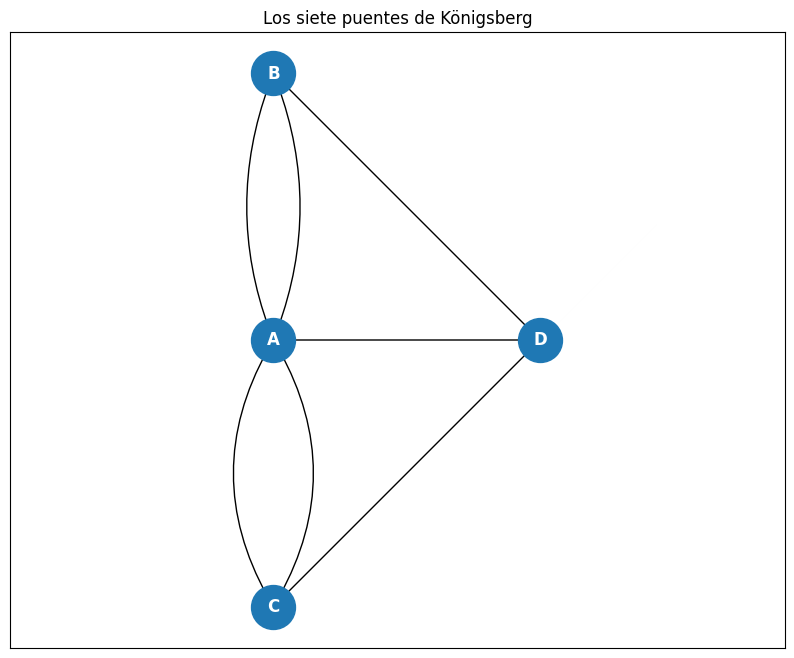

In [94]:
draw_konigsberg_graph(G)

In [95]:
is_connected = nx.is_connected(nx.Graph(G))

degrees = dict(G.degree())

odd_nodes = []
for n, d in degrees.items():
    if d % 2 == 1:
        odd_nodes.append(n)


has_eulerian_circuit = is_connected and len(odd_nodes) == 0
has_eulerian_path = is_connected and len(odd_nodes) == 2

print(f"Conexo: {is_connected}")
print(f"Grados: {degrees}")
print(f"Vértices de grado impar: {odd_nodes}")
print(f"¿Tiene circuito euleriano?: {has_eulerian_circuit}")
print(f"¿Tiene camino euleriano?: {has_eulerian_path}")

Conexo: True
Grados: {'A': 5, 'B': 3, 'C': 3, 'D': 3}
Vértices de grado impar: ['A', 'B', 'C', 'D']
¿Tiene circuito euleriano?: False
¿Tiene camino euleriano?: False


In [ ]:
# Ejercicio: Agregar el puente de 1875 y verificar que exite un camino eureliano